# Introdução à Ciência de Dados

**Heber Tormentino de Sousa**

*Exercício didático*

### Modelagem de tópicos e agrupamento de documentos  

#### Corpus de textos para realizar a atividade:
O Corpus escolhido foi uma coleção de 15 artigos científicos (*.pdf) sobre Ontologias.

**Obs.:** *Outros detalhes dos artigos estão diponíveis no arquivo "lista.txt".*

[ont01.pdf](http://eprints.hud.ac.uk/17545/)  = **A Generic Model of Ontology to Visualize Information Science Domain(OIS)** 

[ont02.pdf](https://www.researchgate.net/publication/310017720)  = **Data-driven Ontology evaluation based on competency questions: a study in the agricultural domain** 

[ont03.pdf](https://www.researchgate.net/publication/335061566)  = **Ontology of Intelligence Preprint** 

[ont04.pdf](https://www.researchgate.net/publication/247935724)  = **On Algebraic Spectrum of Ontology Evaluation** 

*ont05.pdf*  **removido** 

[ont06.pdf](https://www.researchgate.net/publication/320215614)  = **Tesauro: um tipo de ontologia Presentation** 

[ont07.pdf](https://klevas.mif.vu.lt/~donatas/Vadovavimas/Temos/ontologiskaiTeisingasKoncepcinisModeliavimas/papildoma/Guarino98\-Formal%20Ontology%20and%20Information%20Systems.pdf) = **Formal Ontology in Information Systems** 

[ont08.pdf](https://www.researchgate.net/publication/230771114)  = **Ontological Engineering: With Examples from the Areas of Knowledge Management** 

[ont09.pdf](https://www.researchgate.net/publication/221024668)  = **Ontologies Come of Age** 

[ont10.pdf](https://www.researchgate.net/publication/332275872)  = **OntoM4IS+: Ontology Reuse Method for Information Science** 

[ont11.pdf](https://www.researchgate.net/publication/273062391)  = **Practicing an (Ontology spectrum for geological data interoperability** 

[ont12.pdf](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-019-3002-3)  = **ROBOT: A Tool for Automating Ontology** 

[ont13.pdf](https://www.researchgate.net/publication/335857423)  = **OntOLOGY (Heidegger Lexicon)** 

[ont14.pdf](https://www.academia.edu/300216/State_of_the_Art_ontologies)  = **State of the Art: ontologies** 

[ont15.pdf](https://www.researchgate.net/publication/243763523)  = **Task Ontology for reuse of problem solving knowledge** 

[ont16.pdf](https://www.researchgate.net/publication/336229633)  = **Ontology as a System**




Este notebook é baseado em:

1. [notebook do Blog Analytics Vidhya](https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/)
2. [notebook do Brandon Rose](http://www.brandonrose.org)
3. [publicação Brandon Rose](http://www.brandonrose.org/top100)
4. [artigo do Medium](https://medium.com/mlreview/topic-modeling-with-scikit-learn-e80d33668730).

In [1]:
import re
import os
import codecs
import string
import numpy as np
import pandas as pd
import gensim

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import feature_extraction
import mpld3

import pyLDAvis
import pyLDAvis.gensim

from IPython.display import display, Image
from IPython.core.interactiveshell import InteractiveShell

%matplotlib inline

datapath = "pdf"
outputs = "outputs"

### 1 - Agrupando documentos

In [2]:
import textract
import os
onlydirs = [f for f in os.listdir('.') if os.path.isdir(os.path.join('.',f)) and not f.startswith('.')]
corpuspath = 'pdf'

onlyfiles = [f for f in os.listdir(corpuspath) if os.path.isfile(os.path.join(corpuspath,f)) and not f.startswith('.')]
onlydirs.sort()

lista = []
raw_texts = ''
for filename in [f for f in onlyfiles if f.endswith('pdf')]:
    text = textract.process(os.path.join(corpuspath,filename)).decode('utf-8')
    print(filename)
    lista.append(text)     
    raw_texts += '\n'+ text

print(len(lista))    

ont06.pdf
ont16.pdf
ont12.pdf
ont08.pdf
ont13.pdf
ont15.pdf
ont11.pdf
ont09.pdf
ont04.pdf
ont3.pdf
ont7.pdf
ont01.pdf
ont02.pdf
ont10.pdf
ont14.pdf
15


In [3]:
raw_documents = []
raw_documents = lista

print("Números de documentos:",len(raw_documents))

Números de documentos: 15


Criaremos um dicionário a partir de uma lista de documentos.

Um dicionário mapeia cada palavra para um número. 

In [4]:
gen_docs = [[w.lower() for w in word_tokenize(text)] for text in raw_documents]

print(gen_docs)

[['viii', 'enancib', '–', 'encontro', 'nacional', 'de', 'pesquisa', 'em', 'ciência', 'da', 'informação', '28', 'a', '31', 'de', 'outubro', 'de', '2007', '•', 'salvador', '•', 'bahia', '•', 'brasil', 'gt', '2', '–', 'organização', 'e', 'representação', 'do', 'conhecimento', 'comunicação', 'oral', 'ontologias', ':', 'indexação', 'e', 'recuperação', 'de', 'fotografias', 'baseadas', 'na', 'técnica', 'fotográfica', 'e', 'no', 'conteúdo', 'da', 'imagem', 'ontologies', ':', 'photographic', 'indexing', 'and', 'retrieve', 'based', 'on', 'photographic', 'technique', 'and', 'image', 'content', 'miriam', 'paula', 'manini', '(', 'pgcinf/unb', ',', 'mpmanini', '@', 'uol.com.br', ')', 'mamede', 'lima-marques', '(', 'pgcinf/unb', ',', 'mamede', '@', 'unb.br', ')', 'alex', 'sandro', 'santos', 'miranda', '(', 'pgcinf/unb', ',', 'alexsandromiranda', '@', 'gmail.com', ')', 'resumo', ':', 'este', 'trabalho', 'aborda', 'o', 'registro', 'e', 'a', 'recuperação', 'de', 'imagens', 'no', 'contexto', 'de', 'siste

Criaremos um dicionário a partir de uma lista de documentos.
Um dicionário mapeia cada palavra para um número.

In [5]:
dictionary = gensim.corpora.Dictionary(gen_docs)
print(dictionary[5])
print(dictionary.token2id['ontology'])
print("Number of words in dictionary:",len(dictionary))
for i in range(len(dictionary)):
    print(i, dictionary[i])

-
847
Number of words in dictionary: 13551
0 
1 &
2 (
3 )
4 ,
5 -
6 .
7 //protege.stanford.edu/
8 //www.cs.helsinki.fi/u/astyrman/gradu.pdf
9 //www.cs.vu.nl/~guus/papers/hollink03b.pdf
10 //www.cs.vu.nl/~guus/papers/hollink04a.pdf
11 //www.cs.vu.nl/~guus/papers/schreiber01a.pdf
12 //www.ctr.columbia.edu/papers_advent/00/icj00_ana.pdf
13 //www.ctr.columbia.edu/~ajaimes/pubs/spie00_internet.pdf
14 //www.slis.kent.edu/~mzeng/metadata/gilland.pdf
15 //www2003.org/cdrom/papers/poster/p199/p199-hyvonen.html
16 1
17 10
18 11
19 13
20 1986
21 1996
22 1997
23 2
24 20
25 2000
26 2001
27 2002
28 2003
29 2004
30 2005
31 2006
32 2007
33 26
34 28
35 28-36
36 3
37 3.2.1
38 31
39 39-62
40 4
41 49
42 5
43 53
44 5k
45 6
46 64k
47 7
48 8
49 9
50 :
51 ;
52 <
53 >
54 ?
55 @
56 a
57 a.
58 aat
59 abaixo
60 aborda
61 abordagem
62 abordagens
63 abordamos
64 abordou
65 abre
66 abstract
67 abstrato
68 abstratos
69 abstração
70 acervos
71 acesso
72 acessível
73 acidentes
74 acontece
75 acoplado
76 acordo
77 acre

877 paradigmas
878 pares
879 parte
880 particular
881 partimos
882 partir
883 parâmetros
884 passa
885 passo
886 passos
887 paula
888 paulo
889 pela
890 pelas
891 pelo
892 pelos
893 pequena
894 perca
895 permita
896 permitam
897 permite
898 permitem
899 permitindo
900 permitir
901 permitiu
902 pertence
903 período
904 pesquisa
905 pesquisador
906 pesquisadores
907 pesquisas
908 pessoa
909 pgcinf/unb
910 photo
911 photographic
912 photographs
913 photography
914 picture
915 pixels
916 plano
917 png
918 pode
919 podem
920 podemos
921 point
922 pois
923 ponderação
924 ponto
925 por
926 porquê
927 possa
928 possam
929 posse
930 possuem
931 possui
932 possível
933 pouco
934 precisa
935 precisamente
936 preciso
937 precisos
938 precisão
939 prefixo
940 preocupadas
941 presente
942 presentes
943 preservação
944 press
945 primeira
946 primeiramente
947 primeiros
948 principais
949 principal
950 princípio
951 problema
952 problemas
953 process
954 processamento
955 processo
956 produzida
957 pr

1666 experimental
1667 explanations
1668 eyes
1669 f.
1670 f.m
1671 facilitating
1672 factor
1673 false
1674 feb
1675 file
1676 finally
1677 first-order
1678 focus
1679 focus.
1680 focused
1681 following
1682 form
1683 formal
1684 formally
1685 format
1686 forms
1687 formulating
1688 foundational
1689 foundations
1690 fourth
1691 frameworks
1692 free
1693 from
1694 front
1695 functional
1696 functions
1697 fund
1698 fundamental
1699 further
1700 general
1701 generates
1702 generic
1703 given
1704 global
1705 goals
1706 graph
1707 graphs
1708 grasman
1709 great
1710 group
1711 grouped
1712 grouping
1713 groups
1714 grove
1715 gruber
1716 guided
1717 has
1718 have
1719 help
1720 helpful
1721 helps
1722 heylighen
1723 hierarchical
1724 hierarchy
1725 hilbert
1726 history
1727 hitchins
1728 hold
1729 home
1730 house
1731 how
1732 however
1733 https
1734 human
1735 human-readable
1736 humans
1737 hypotheses
1738 i
1739 i.e.
1740 identification
1741 identified
1742 identifies
1743 identify
1

2475 bodies
2476 bootstrap
2477 bot
2478 bottom
2479 brinkman
2480 broad
2481 browse
2482 browser
2483 bsd
2484 bug
2485 bugs
2486 build
2487 building
2488 builds
2489 c
2490 c.j
2491 c.r
2492 call
2493 calls
2494 canada
2495 capture
2496 carolina
2497 carried
2498 carroll
2499 cause
2500 caused
2501 central
2502 centralized
2503 certain
2504 ceur
2505 chain
2506 chained
2507 chaining
2508 challenge
2509 change
2510 changes
2511 chapel
2512 characteristics
2513 chebi
2514 check
2515 checked
2516 checkmark
2517 checks
2518 chemical
2519 chemistry
2520 choose
2521 christopher
2522 ci
2523 circa
2524 cj
2525 cjm
2526 cl
2527 claims
2528 cleaner
2529 cli
2530 clicking
2531 closed
2532 code
2533 codebase
2534 coherency
2535 coherent
2536 collaboratively
2537 collapse-import-closure
2538 combine
2539 combined
2540 combines
2541 comes
2542 comma-
2543 comma-separated
2544 command
2545 command-line
2546 commandline
2547 commands
2548 commit
2549 commitment
2550 commits
2551 commons
2552 commun

3373 so
3374 solicited
3375 soon
3376 sorts
3377 sourceforge
3378 special
3379 specialized
3380 species
3381 specifies
3382 spectrum
3383 spend
3384 spent
3385 spreadsheet
3386 spreadsheets
3387 springer
3388 spurious
3389 standardization
3390 standardized
3391 star
3392 stated
3393 statement
3394 statements
3395 status
3396 steinbeck
3397 step
3398 steps
3399 still
3400 stored
3401 strategy
3402 strike
3403 strings
3404 strokes
3405 stucky
3406 style
3407 subclassof
3408 subclassof/equivalentto
3409 subcontracted
3410 submitting
3411 subset
3412 subsets
3413 succeed
3414 successfully
3415 suggested
3416 suggestion
3417 suite
3418 suited
3419 summarize
3420 superclass
3421 superclasses
3422 supported
3423 supporting
3424 switched
3425 symp
3426 symptoms
3427 syntactic
3428 syntax
3429 syntaxes
3430 systematic
3431 tab-separated
3432 table
3433 tabseparated
3434 tabular
3435 take
3436 taking
3437 targets
3438 tdwg
3439 team
3440 tedious
3441 template
3442 template-based
3443 template-dr

4239 exhaustive-decomposition
4240 exhaustive-disjoint
4241 experiences
4242 expert
4243 explicit
4244 explicitly
4245 expor
4246 export
4247 export/import
4248 expressed
4249 expressiveness
4250 exten
4251 extendibility
4252 extensibility
4253 extensions
4254 extranet
4255 extranets
4256 faatz
4257 fabris
4258 facets
4259 facilities
4260 facts/claims
4261 facultad
4262 farquhar
4263 father
4264 fca-merge
4265 feasibility
4266 feb8-2002
4267 february
4268 fellbaum
4269 female
4270 fensel
4271 fernandez-lopez
4272 fernánde-lópez
4273 fernández
4274 fernández-lópez
4275 fi.upm.es
4276 fido
4277 fikes
4278 finalprice
4279 findcinema
4280 finin
4281 fipa
4282 fit
4283 fj
4284 flight
4285 flightnumber
4286 flock
4287 flogic
4288 floor
4289 flossie
4290 flows
4291 fluffy
4292 flying
4293 fois
4294 fois'01
4295 followed
4296 for-all
4297 forall
4298 force
4299 force-unit
4300 forfatter
4301 formalisation
4302 formalism
4303 formalisms
4304 formality
4305 formalization
4306 formalize
4307 form

5131 topic-of
5132 torasso
5133 tove
5134 toward
5135 towards
5136 tr
5137 traditional
5138 train
5139 train-travel
5140 traintravel
5141 transactions
5142 transforming
5143 transforms
5144 transition
5145 translation
5146 translators
5147 transparent
5148 transported
5149 transportmeans
5150 travel
5151 travel-ontology
5152 travel.aa7462
5153 travel.arrivalplace
5154 travel.departuredate
5155 travel.singlefare
5156 traveling
5157 travelling
5158 tree
5159 trees
5160 trento
5161 trip
5162 truck
5163 trucks
5164 trying
5165 tua
5166 tweenty
5167 twente
5168 type-of-project
5169 typologies
5170 u
5171 ubiquity
5172 uddi
5173 un
5174 una
5175 underlying
5176 understandability
5177 unit-of-measure
5178 unit-ofmeasure
5179 united
5180 units
5181 univ
5182 universals
5183 universidad
5184 unnamed
5185 unspsc
5186 upm
5187 upper
5188 uri
5189 url=
5190 usable
5191 usalocation
5192 uschold
5193 usdollar
5194 use-ontology
5195 v.1
5196 v.2
5197 v.3
5198 valente
5199 value=
5200 van
5201 vandriv

6026 propounds
6027 publicness
6028 pulled
6029 purview
6030 puts
6031 qua
6032 quest
6033 question
6034 question-smothering
6035 questioning
6036 questioning.
6037 radical
6038 radicalization
6039 radikalen
6040 raise
6041 rampant
6042 rate
6043 rational
6044 razors
6045 reached
6046 readily
6047 really
6048 realms
6049 reawakening
6050 recipe
6051 reconﬁgure
6052 recourse
6053 referring
6054 refers
6055 regain
6056 region
6057 regional
6058 regression
6059 reject
6060 relates
6061 relatively
6062 remaining
6063 render
6064 rendered
6065 rendering
6066 renders
6067 renditions
6068 reorientation
6069 reserves
6070 resisting
6071 resolutely
6072 respond
6073 rest
6074 returning
6075 revealing
6076 reversing
6077 reﬂections
6078 reﬂectively
6079 rich
6080 riddle
6081 rightly
6082 robinson
6083 rough
6084 route
6085 routine
6086 routinely
6087 saddling
6088 saint
6089 salt
6090 scarcely
6091 scientiﬁc
6092 screwdrivers
6093 sections
6094 seek
6095 seem
6096 seems
6097 sees
6098 seiendes
6

6858 quaternary
6859 quoting
6860 r.b.
6861 r.g.
6862 r.j.
6863 raskin
6864 rdf/owl-based
6865 rebuild
6866 receives
6867 recognize
6868 recognizing
6869 record
6870 recording
6871 records
6872 reeves
6873 refined
6874 refuge
6875 regards
6876 renewal
6877 replacing
6878 researchers
6879 respectively
6880 reston
6881 reviews
6882 ribeiro-neto
6883 richard
6884 riedemann
6885 rock
6886 rossiter
6887 roy
6888 s.d.
6889 s.m
6890 s.m.
6891 s.r
6892 scale
6893 scales
6894 scanes
6895 schemas
6896 schetselaar
6897 schubert
6898 scientists
6899 scotland
6900 seamless
6901 second-order
6902 secondorder
6903 sediments
6904 seismic
6905 semantically
6906 semanticists
6907 sen
6908 serrano
6909 serviceoriented
6910 seven
6911 sharpe
6912 shelf
6913 sheth
6914 short-term
6915 showing
6916 sigmod
6917 simons
6918 sinha
6919 size
6920 skos
6921 skosbased
6922 society
6923 soil
6924 soils
6925 solar-terrestrial
6926 solarterrestrial
6927 soller
6928 south-east
6929 spelling
6930 spink
6931 spinning
6

7709 0.2553
7710 0.2668
7711 0.2706
7712 0.2708
7713 0.2762
7714 0.2793
7715 0.2806
7716 0.2809
7717 0.2860
7718 0.2891
7719 0.29
7720 0.3039
7721 0.3109
7722 0.3229
7723 0.3261
7724 0.3461
7725 0.3536
7726 0.3537
7727 0.3619
7728 0.3884
7729 0.4046
7730 0.4047
7731 0.4190
7732 0.4345
7733 0.4377
7734 0.4397
7735 0.4397
7736 0.4448
7737 0.4694
7738 0.4824
7739 0.4952i
7740 0.4985
7741 0.5056
7742 0.5174
7743 0.5188
7744 0.5532
7745 0.5878
7746 0.5936
7747 0.6225
7748 0.6309
7749 0.6351
7750 0.6411
7751 0.6533
7752 0.6731
7753 0.6866
7754 0.6898
7755 0.6898
7756 0.7390
7757 0.7437
7758 0.7743
7759 0.9189
7760 0095-8956/85
7761 09
7762 0
7763 0
7764 0
7765 0
7766 0
7767 1-18
7768 1-7
7769 1.2593
7770 1.3288
7771 1.4299
7772 1.6785
7773 1.83
7774 10.14569/ijacsa.2011.020724
7775 117
7776 12λ
7777 159
7778 15λ5
7779 160
7780 161
7781 162
7782 163
7783 164
7784 165
7785 166
7786 167
7787 168
7788 187-209
7789 1979
7790 1
7791 2.1010
7792 2.1667
7793 2.33
7794 2.4046
7795 2.43
7796

8517 confined
8518 consensus
8519 consisting
8520 constant
8521 constituted
8522 constrain
8523 consulting
8524 contribution
8525 cooperate
8526 cooperating
8527 coopers
8528 corso
8529 cortona
8530 costs
8531 countable
8532 couples
8533 d6
8534 declarations
8535 dehne
8536 deliberately
8537 den
8538 denoting
8539 derivable
8540 design1
8541 designer
8542 designing
8543 detaching
8544 devoted
8545 di
8546 diagnosing
8547 disadvantages7
8548 disparate
8549 domain-level
8550 ease-of-maintenance
8551 edi
8552 editorial
8553 elaborate
8554 elsewhere
8555 embody
8556 encounter
8557 enterprises
8558 epistemic
8559 equally
8560 erroneous
8561 esprit
8562 establish
8563 established
8564 excludes
8565 extensional
8566 eρ
8567 facto
8568 fairly
8569 fancy
8570 fascinating
8571 favor
8572 federation
8573 fine-grained
8574 fitié
8575 fois'98
8576 form-based
8577 formulate
8578 formulated
8579 forthcoming
8580 franconi
8581 fraternali
8582 functionalities
8583 gathering
8584 generality
8585 gesells

9427 5-5
9428 5-7
9429 5-8
9430 5-9
9431 5.1
9432 5.1.1
9433 5.1.1.1
9434 5.1.1.2
9435 5.1.1.3
9436 5.1.1.4
9437 5.1.2
9438 5.2
9439 5.3
9440 5.minimal
9441 510
9442 541
9443 55-71
9444 55-78
9445 5501000
9446 566
9447 5677320-010-
9448 580
9449 5814
9450 5887082
9451 594
9452 6,864
9453 6-
9454 6-2
9455 6-3
9456 6-6
9457 6.
9458 6.1
9459 6.2
9460 6.3
9461 60
9462 600
9463 62
9464 621.3893
9465 624
9466 624-639
9467 636
9468 637-651
9469 64
9470 642
9471 65
9472 650
9473 67
9474 68
9475 696309
9476 7-
9477 7-26
9478 70
9479 700
9480 706
9481 71
9482 71-
9483 71-83
9484 71-93
9485 73
9486 74
9487 7400
9488 7500
9489 77
9490 770
9491 777-1026
9492 777-1215
9493 777-7938
9494 777-8749
9495 777-9086
9496 78
9497 7887
9498 794-4940
9499 8-
9500 800
9501 803
9502 814-393-2469
9503 83
9504 837
9505 84
9506 84-102
9507 85
9508 895-2487
9509 895-2494
9510 9.12.2009
9511 900
9512 901
9513 93-155
9514 94565306.owl
9515 949-824-4971
9516 949824-4971
9517 99-153
9518 :02.10.2009
9519 :10.03.2010
95

10314 dichotomy
10315 differ
10316 differentiate
10317 differentiates
10318 differs
10319 difficulties
10320 difussion
10321 digit
10322 digitaliz
10323 digitalization
10324 dimensional
10325 diminutions
10326 disadvantage
10327 disadvantages
10328 disagree
10329 disagreeing
10330 disaster
10331 disc
10332 disc-recorder
10333 disc-rewritable
10334 discerning
10335 disciplines
10336 discovered
10337 discriminated
10338 discs
10339 disjoin
10340 disjoint-
10341 disjointnes
10342 disjoint–decomposition
10343 disjunction
10344 disk
10345 displays
10346 dissatisfied
10347 disseminated
10348 dissemination
10349 distances
10350 distributing
10351 distrubuted
10352 distrust
10353 divide
10354 divides
10355 dividing
10356 division
10357 divisions
10358 dixon
10359 djuric
10360 dmterie
10361 docid=10196635
10362 doctor
10363 doctoral
10364 doctors
10365 doctype
10366 document.
10367 documentarian
10368 documenting
10369 documentray
10370 dogpile
10371 dohn
10372 doing
10373 dom
10374 domain‖
103

11115 konno
11116 konqueror
11117 kraft
11118 kraut
11119 krivov
11120 krötzsch
11121 ksu
11122 ksu.edu.sa
11123 ksu.edu.sa/menai
11124 l+
11125 labelled
11126 lable
11127 lacks
11128 lancaster
11129 landscape
11130 lang=
11131 languag
11132 large-scaled
11133 largescale
11134 large–scale
11135 lau
11136 launch
11137 launched
11138 lave
11139 law
11140 lawrence
11141 laws
11142 lawvere
11143 lays
11144 lcc
11145 leadership
11146 leagal
11147 learn
11148 learnt
11149 leave
11150 leaving
11151 lect
11152 lecturer
11153 lecturers,5
11154 legislation
11155 legitimate
11156 leimeister
11157 leonard
11158 letters
11159 level‖
11160 lewis
11161 lewisian
11162 lexicons
11163 lfrankli
11164 li
11165 liang
11166 libaraian
11167 libarains
11168 libarian
11169 libarry
11170 librarian
11171 librarianmanager
11172 librarianship
11173 libraries.the
11174 librarycatalogue
11175 librarycommunity
11176 librarydirector
11177 libraryofinformationdepartment
11178 libraryservice
11179 libri
11180 libya
1118

12024 rule=concept2
12025 runel.ac.uk
12026 rupert
12027 rupert.ward
12028 rw
12029 s-
12030 s.-c.
12031 saad
12032 sabou
12033 sac
12034 saed
12035 safari
12036 sage
12037 sai
12038 sake
12039 salahat
12040 saleh
12041 salience
12042 salim
12043 salton,1969
12044 sam
12045 sameindividualas
12046 samer
12047 samersaed20012002
12048 sanchez-schmitz
12049 sanctions
12050 sans-serif
12051 sardinia
12052 satellite
12053 satisfaction
12054 satisfactory
12055 satisfied
12056 satisifaction
12057 saud
12058 saunders
12059 save
12060 saves
12061 sawsaa
12062 says
12063 sc
12064 sc.edu
12065 scan
12066 sche
12067 scholars
12068 school-
12069 schwen
12070 scie
12071 sciecne
12072 science.
12073 science..
12074 science‖
12075 scient
12076 scientometrics
12077 scintific
12078 scrat
12079 screenshot
12080 screenshots
12081 script
12082 scurity
12083 sd
12084 searchable
12085 searched
12086 searchnz
12087 seci
12088 secondary
12089 section1
12090 section2
12091 section2.1.9
12092 section3
12093 secti

12944 ‎5-10
12945 ‎5-11
12946 ‎5-12
12947 ‎5-13
12948 ‎5-14
12949 ‎5-15
12950 ‎5-16
12951 ‎5-17
12952 ‎5-18
12953 ‎5-19
12954 ‎5-2
12955 ‎5-3
12956 ‎5-4
12957 ‎5-5
12958 ‎5-6
12959 ‎5-7
12960 ‎5-8
12961 ‎5-9
12962 ‎6-1
12963 ‎6-2
12964 ‎6-3
12965 ‐
12966 ‐‐
12967 –a
12968 –computer
12969 –decomposition
12970 –e.g
12971 –full
12972 –owl
12973 –related
12974 –relationships
12975 –sharing
12976 –subclasses
12977 ―
12978 ―..
12979 ―==‖
12980 ―a
12981 ―aaae5‖
12982 ―about‖
12983 ―agree‖
12984 ―all
12985 ―an
12986 ―author‖
12987 ―computer
12988 ―data‖
12989 ―do
12990 ―does
12991 ―education
12992 ―employee‖
12993 ―evidentialvalue‖
12994 ―explicit
12995 ―getting
12996 ―given
12997 ―indexer‖
12998 ―information
12999 ―institution‖
13000 ―it
13001 ―jaguar‖
13002 ―knowledge
13003 ―library‖
13004 ―methontology
13005 ―most
13006 ―ontology
13007 ―ontology‖
13008 ―organization‖
13009 ―our
13010 ―people‖
13011 ―person‖
13012 ―publiclibrary‖
13013 ―she
13014 ―specialist
13015 ―the
13016 ―thing‖
13017 ―t

Agora vamos criar um corpus. Um corpus é um saco-de-palavras (bag-of-words).
Uma representação bag-of-words para um documento apenas lista o número de vezes que cada palavra ocorre no documento. 

A função **`doc2bow`** converte o documento (uma lista de palavras) no formato bag-of-words = lista de (token_id, token_count) 2-tuplas. Assume-se que cada palavra seja uma sequência **tokenizada e normalizada** (unicode ou codificada em utf8). Nenhum pré-processamento adicional é feito nas palavras do *documento*; aplique tokenização, stemming etc. antes de chamar esse método.

Se **`allow_update`** estiver definido, também atualiza o dicionário no processo: cria IDs para novas palavras. Ao mesmo tempo, atualiza as frequências do documento - para cada palavra que aparece neste documento, aumenta a frequência do documento (*`self.dfs`*) em um.

Se **`allow_update`** não estiver definido, essa função será *const*, ou seja,  *somente leitura*. 

In [6]:
corpus = [dictionary.doc2bow(gen_doc) for gen_doc in gen_docs]
for d in corpus:
    print(d)

[(0, 2), (1, 1), (2, 45), (3, 45), (4, 372), (5, 19), (6, 277), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 3), (18, 2), (19, 3), (20, 6), (21, 2), (22, 4), (23, 7), (24, 1), (25, 6), (26, 2), (27, 5), (28, 2), (29, 2), (30, 3), (31, 6), (32, 2), (33, 2), (34, 1), (35, 1), (36, 3), (37, 1), (38, 1), (39, 1), (40, 4), (41, 2), (42, 3), (43, 1), (44, 1), (45, 3), (46, 1), (47, 2), (48, 2), (49, 1), (50, 83), (51, 43), (52, 3), (53, 3), (54, 6), (55, 3), (56, 243), (57, 3), (58, 2), (59, 4), (60, 1), (61, 1), (62, 1), (63, 3), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 9), (72, 1), (73, 1), (74, 1), (75, 1), (76, 2), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 2), (83, 4), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 3), (92, 1), (93, 5), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 2), (100, 5), (101, 3), (102, 1), (103, 1), (104, 1), (105, 1), (106, 11), (107, 1), (108, 2), (109, 1

Agora criamos um modelo tf-idf a partir do corpus.

**`gensim.models.TfidfModel(corpus)`**: implementa a funcionalidade relacionada aos modelos de *frequência de termo - frequência inversa de termos* em um espaço vetorial para o documento.

In [7]:
tf_idf = gensim.models.TfidfModel(corpus)
print(tf_idf)
s = 0
for i in corpus:
    s += len(i)
print(s)

TfidfModel(num_docs=15, num_nnz=24969)
24969


### Criar um objeto de medida de similaridade no espaço tf-idf.

Calcule semelhanças em uma coleção de documentos no espaço vetorial do modelo.

A classe principal é **`Similarity`**, que cria um índice para um determinado conjunto de documentos. Depois que o índice é criado, você pode executar consultas eficientes como "Diga-me quão semelhante é esse documento de consulta para cada documento no índice?". O resultado é um vetor de números tão grandes quanto o tamanho do conjunto inicial de documentos, ou seja, um flutuador para cada documento de índice. Como alternativa, você também pode solicitar apenas os N principais documentos de índice mais semelhantes à consulta. 

In [8]:
sims = gensim.similarities.Similarity(outputs,tf_idf[corpus],num_features=len(dictionary))
print(sims)
print(type(sims))

Similarity index with 15 documents in 0 shards (stored under outputs)
<class 'gensim.similarities.docsim.Similarity'>


Criar um documento de consulta e convertê-lo para tf-idf.  

In [9]:
query_doc = [w.lower() for w in word_tokenize(lista[0])]
print(query_doc)
query_doc_bow = dictionary.doc2bow(query_doc)
print(query_doc_bow)
query_doc_tf_idf = tf_idf[query_doc_bow]
print(query_doc_tf_idf)

['viii', 'enancib', '–', 'encontro', 'nacional', 'de', 'pesquisa', 'em', 'ciência', 'da', 'informação', '28', 'a', '31', 'de', 'outubro', 'de', '2007', '•', 'salvador', '•', 'bahia', '•', 'brasil', 'gt', '2', '–', 'organização', 'e', 'representação', 'do', 'conhecimento', 'comunicação', 'oral', 'ontologias', ':', 'indexação', 'e', 'recuperação', 'de', 'fotografias', 'baseadas', 'na', 'técnica', 'fotográfica', 'e', 'no', 'conteúdo', 'da', 'imagem', 'ontologies', ':', 'photographic', 'indexing', 'and', 'retrieve', 'based', 'on', 'photographic', 'technique', 'and', 'image', 'content', 'miriam', 'paula', 'manini', '(', 'pgcinf/unb', ',', 'mpmanini', '@', 'uol.com.br', ')', 'mamede', 'lima-marques', '(', 'pgcinf/unb', ',', 'mamede', '@', 'unb.br', ')', 'alex', 'sandro', 'santos', 'miranda', '(', 'pgcinf/unb', ',', 'alexsandromiranda', '@', 'gmail.com', ')', 'resumo', ':', 'este', 'trabalho', 'aborda', 'o', 'registro', 'e', 'a', 'recuperação', 'de', 'imagens', 'no', 'contexto', 'de', 'sistem

Mostramos uma variedade de semelhanças de documentos para consulta.
Vemos que o segundo documento é o mais semelhante à sobreposição de meias e força.

In [10]:
sims[query_doc_tf_idf]

array([1.00000298e+00, 1.40713376e-03, 2.21712003e-03, 1.08835343e-02,
       1.88344717e-03, 1.21534395e-05, 1.72436400e-03, 3.18406313e-03,
       8.54503550e-03, 5.72819123e-03, 1.09699452e-02, 2.31306860e-03,
       3.72762373e-03, 2.87222952e-01, 5.97717939e-03], dtype=float32)

 ## [Modelagem de tópicos](http://www.cs.columbia.edu/~blei/topicmodeling.html)

O setor de análise tem como objetivo obter as "informações" dos dados. Com a crescente quantidade de dados nos últimos anos, que na maioria das vezes não é estruturada, é difícil obter as informações relevantes e desejadas. Porém, a tecnologia desenvolveu alguns métodos poderosos que podem ser usados ​​para extrair os dados e buscar as informações que estamos procurando.

Uma dessas técnicas no campo de mineração de texto é a modelagem de tópicos. Como o nome sugere, é um processo para identificar automaticamente tópicos presentes em um objeto de texto e derivar padrões ocultos exibidos por um corpus de texto. Assim, auxiliando na melhor tomada de decisão.

A modelagem de tópicos é diferente das abordagens de mineração de texto baseadas em regras que usam expressões regulares ou técnicas de pesquisa de palavras-chave baseadas em dicionário. É uma abordagem não supervisionada usada para encontrar e observar o conjunto de palavras (chamadas de "tópicos") em grandes grupos de textos.

Os tópicos podem ser definidos como "um padrão repetitivo de termos co-ocorrentes em um corpus". Um bom modelo de tópico deve resultar em - "saúde", "médico", "paciente", "hospital" para um tópico - Assistência médica e "fazenda", "lavouras", "trigo" para um tópico - "Agricultura".

Os modelos de tópicos são muito úteis para fins de agrupamento de documentos, organização de grandes blocos de dados textuais, recuperação de informações de texto não estruturado e seleção de recursos. Por exemplo - o New York Times está usando modelos de tópicos para aumentar seus mecanismos de recomendação de artigos para usuários. Vários profissionais estão usando modelos de tópicos para as indústrias de recrutamento, onde pretendem extrair recursos latentes das descrições de cargos e mapeá-los para os candidatos certos. Eles estão sendo usados para organizar grandes conjuntos de dados de e-mails, análises de clientes e perfis de mídia social do usuário.

![Modelagem](Figs/Modeling1.png)


#### 2.1 - Modelagem de Tópicos por Alocação Latente de Dirichlet (Latent Dirichlet Allocation)

Existem muitas abordagens para obter tópicos de um texto como:
* Frequência de termos e Frequência inversa de documentos; 
* Técnicas de fatoração de matriz não negativa; e
* A Alocação Latente de Dirichlet.

 `A Alocação Latente de Dirichlet é a técnica de modelagem de tópicos mais popular`.

A LDA assume que os documentos são produzidos a partir de uma mistura de tópicos. Esses tópicos geram palavras com base em sua distribuição de probabilidade. Dado um conjunto de documentos, o LDA rastreia e tenta descobrir que tópicos criaria esses documentos em primeiro lugar.

LDA é uma técnica de fatoração matricial. No espaço vetorial, qualquer corpus (coleção de documentos) pode ser representado como uma matriz termo-documento. A matriz a seguir mostra um corpus de N documentos D1, D2, D3… Dn e  vocabulário de tamanho M com as palavras W1, W2 .. Wn. O valor da célula i, j fornece a contagem de frequências da palavra Wj no Documento Di. 

![Modelagem](Figs/Modeling2.png)
 

O LDA converte este documento-matriz-de-termo em duas matrizes menores - M1 e M2.
M1 é uma matriz de docuemnto-tópicos (dimensões (N, K)) e M2 é uma matriz tópico-termos (dimensões (K, M)), onde N é o número de documentos, K é o número de tópicos e M é o (número de vocábulos) tamanho do vocabulário.

![Modelagem](Figs/modeling3.png)

Observe que essas duas matrizes já fornecem distribuições de "palavras de tópicos" e "documentos de tópicos". No entanto, essa distribuição precisa ser aprimorada, que é o principal objetivo do LDA. A LDA utiliza técnicas de amostragem para melhorar essas matrizes.

Ele itera através de cada palavra "w" para cada documento "d" e tenta ajustar o tópico atual - a palavra é atribuída uma nova atribuição. Ao novo tópico "k" é atribuído a palavra "w" com uma probabilidade P, que é um produto de duas probabilidades p1 e p2.

Para cada tópico, duas probabilidades p1 e p2 são calculadas. 

P1 - p(tópico t/documento d) = a proporção de palavras no documento d atualmente atribuídas ao tópico t. 

P2 - p(palavra p/tópico t) = a proporção de atribuições ao tópico t em todos os documentos provenientes dessa palavra w.

**O tópico atual** - atribuição de palavras é atualizado com um novo tópico com a probabilidade, produto de p1 e p2. Nesta etapa, o modelo assume que todas as atribuições de tópicos de palavras existentes, exceto a palavra atual, estão corretas. Essa é essencialmente a probabilidade de o tópico não gerar a palavra w; portanto, faz sentido ajustar o tópico da palavra atual com nova probabilidade.

Após várias iterações, é alcançado um estado estacionário em que as distribuições de tópicos e termos de tópicos são razoavelmente boas. Este é o ponto de convergência da LDA.

 
### Parâmetros da LDA

**Hiperparâmetros alfa e beta:** *alfa* representa a densidade do tópico do documento e *Beta* representa a densidade do tópico-palavra. Quanto maior o valor de *alfa*, mais tópicos compõem os documentos e o valor de *alfa* menor indicam que os documentos contêm menos tópicos. Por outro lado, quanto maior o *beta*, mais palavras compõem o tópico no corpus e, com o menor valor de *beta* menos palavras nos tópicos.

**Número de tópicos** - Número de tópicos a serem extraídos do corpus. Os pesquisadores desenvolveram abordagens para obter um número ideal de tópicos usando o *"**Kullback Leibler Divergence Score**"*.

*Para entender, pode-se consultar este [1] artigo original sobre o uso da divergência KL*.

**Número de termos do tópico** - Número de termos compostos em um único tópico. Geralmente é decidido de acordo com a exigência. Se a declaração do problema falar sobre a extração de temas ou conceitos, é recomendável escolher um número maior; se a declaração do problema falar sobre a extração de recursos ou termos, é recomendável um número baixo.

Número de iterações / passes - número máximo de iterações permitidas ao algoritmo LDA para convergência.

#### 2.2 - Modelando Tópicos: Exempl0 1 - Gensim

In [11]:
doc_complete = raw_documents

### Limpeza e pré-processamento

A limpeza é uma etapa importante antes de qualquer tarefa de mineração de texto. Nesta etapa, removeremos as pontuações, palavras irrelevantes e normalizaremos o corpus.

In [12]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete]   

### Preparando a matriz de termos do documento

Todos os documentos de texto combinados são conhecidos como corpus. Para executar qualquer modelo matemático no corpus de texto, é uma boa prática convertê-lo em uma representação matricial. O modelo LDA procura repetir padrões de termos em toda a matriz DT. O Python fornece muitas ótimas bibliotecas para práticas de mineração de texto, “gensim” é uma biblioteca limpa e bonita para lidar com dados de texto. É escalável, robusto e eficiente. O código a seguir mostra como converter um corpus em uma matriz de termo de documento.

In [13]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

### Executando o modelo LDA

O próximo passo é criar um objeto para o modelo LDA e treiná-lo na Document-Term Matrix. O treinamento também requer alguns parâmetros como entrada, explicados na seção acima. O módulo **gensim** permite a estimativa do modelo LDA a partir de um corpus de treinamento e a inferência da distribuição de tópicos em documentos novos e não vistos.

In [14]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50)

In [15]:
#print(ldamodel.print_topics(num_topics=3, num_words=36))

for s in ldamodel.print_topics(num_topics=50, num_words=10):
    print(s)
    print('\n')

(0, '0.051*"0" + 0.032*"de" + 0.018*"da" + 0.013*"1" + 0.013*"e" + 0.008*"\uf0ea" + 0.008*"que" + 0.007*"imagem" + 0.007*"em" + 0.006*"imagens"')


(1, '0.027*"ontology" + 0.006*"term" + 0.005*"information" + 0.005*"geological" + 0.005*"may" + 0.004*"used" + 0.004*"–" + 0.004*"data" + 0.004*"system" + 0.004*"application"')


(2, '0.032*"ontology" + 0.013*"knowledge" + 0.011*"information" + 0.008*"domain" + 0.007*"concept" + 0.006*"science" + 0.006*"class" + 0.005*"language" + 0.004*"system" + 0.004*"model"')




#### 2.3 - Exemplo 2: Modelagem de Tópicos em Scikit Learn

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation

Gensim é uma biblioteca incrível e se adapta muito bem a grandes corpus de texto. Gensim, no entanto, não inclui a fatoração de matriz não negativa (NMF), que também pode ser usada para encontrar tópicos no texto. A base matemática subjacente ao NMF é bem diferente da LDA. Às vezes, o NMF produz tópicos mais significativos para conjuntos de dados menores. 

A NMF foi incluída no **`Scikit Learn`** por um bom tempo, mas a LDA apenas recentemente (final de 2015) foi incluída. 

O bom de usar o **`Scikit Learn`** é que ele traz consistência de API, o que torna quase trivial executar a Modelagem de Tópicos usando LDA e NMF. 

O **`Scikit Learn`** também inclui opções de propagação para NMF, o que ajuda muito na convergência de algoritmos e oferece variantes online e em lote de LDA.

![NMF](Figs/nmf.png)

In [17]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Tópico %d:" % (topic_idx))
        print ("    " + " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])+" \n")

In [18]:
no_features = 1000


A criação da matriz do pacote de palavras é muito fácil no Scikit Learn - todo o trabalho pesado é feito pela funcionalidade de extração de recursos fornecida para conjuntos de dados de texto. Um transformador **`tf-idf`** é aplicado à matriz de bag-of-words NMF para processar o **TfidfVectorizer**. Por outro lado, o LDA, por ser um modelo gráfico probabilístico (ou seja, lidar com probabilidades), requer apenas contagens brutas; portanto, um **CountVectorizer** é usado. As **stopwords** são removidas e o número de termos incluídos na matriz do conjunto de palavras (*bag of words matrix*) é restrito aos 1000 principais.

**Transformar uma matriz de contagem em uma representação tf ou tf-idf normalizada**

**Tf** significa termo-frequência enquanto **tf-idf** significa termo-frequência vezes a frequência inversa do documento. Esse é um esquema comum de ponderação de termos na recuperação de informações, que também encontrou um bom uso na classificação de documentos.

O objetivo de usar **tf-idf** em vez das frequências brutas de ocorrência de um token em um determinado documento é reduzir o impacto de tokens que ocorrem com muita frequência em um determinado corpus e, portanto, são empiricamente menos informativos do que os recursos que ocorrem em uma pequena fração do corpus de treinamento. 

A fórmula usada para calcular o **tf-idf** para um termo t de um documento d em um conjunto de documentos é 

        tf-idf(t,d) = tf(t,d) * idf(t),

e o **idf** é calculado como 

        idf (t) = log [n / df (t)] + 1 (se smooth_idf = False),

em que,
    n é o número total de documentos no conjunto de documentos e 
    
    df(t) é a frequência de documentos de t; 
    
    a frequência do documento é o número de documentos no conjunto de documentos que contêm o termo t.
    
    O efeito de adicionar "1" ao **idf**  para que termos com **idf** zero e que ocorrem em todos os documentos não sejam totalmente ignorados.

Observe que a fórmula **idf** acima difere da notação padrão do livro didático que define o idf como 

        idf(t) = log [n / (df (t) + 1)]

Se smooth_idf = True (o padrão), a constante "1" é adicionada ao numerador e denominador do idf como se um documento extra fosse visto contendo todos os termos da coleção exatamente uma vez, o que evita divisões por zero: 

        idf(d,t) = log[(1 + n) / (1 + df (d, t))] + 1

Além disso, as fórmulas usadas para calcular tf e idf dependem das configurações de parâmetros que correspondem à notação SMART usada no IR da seguinte maneira:

    Tf é "n" (natural) por padrão, "l" (logarítmico) quando sublinear_tf = True. 

    Idf é "t" quando use_idf é fornecido, "n" (nenhum) caso contrário.
    
    A normalização é “c” (cosseno) quando norma = 'l2', “n” (nenhum) quando norma = Nenhuma.


In [19]:
# NMF is able to use tf-idf
documents = doc_complete
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [20]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

Como mencionado anteriormente, os algoritmos não conseguem determinar automaticamente o número de tópicos e esse valor deve ser definido ao executar o algoritmo. Documentação abrangente sobre os parâmetros disponíveis está disponível para NMF e LDA. A inicialização das matrizes W e H no NMF com **`nndsvd`** em vez da inicialização aleatória melhora o tempo necessário para o NMF convergir. O LDA também pode ser configurado para ser executado no modo em lote ou online.

no_topics = 20 foi reduzido para 10  

In [21]:
no_topics = 15

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', \
                                learning_offset=50.,random_state=0).fit(tf)

## Exibindo e avaliando tópicos

A estrutura das matrizes resultantes retornadas pelo NMF e pelo LDA é a mesma e a interface do Scikit Learn para acessar as matrizes retornadas também é a mesma. Isso é ótimo e permite um método Python comum capaz de exibir as principais palavras em um tópico. Os tópicos não são rotulados pelo algoritmo - um índice numérico é atribuído.

Os tópicos derivados do NMF e LDA são exibidos abaixo. Dos tópicos derivados da NMF, os Tópicos 0 e 8 não parecem ser sobre algo em particular, mas os outros tópicos podem ser interpretados com base nas palavras principais. O LDA para o conjunto de dados de 20 grupos de notícias produz 2 tópicos com dados ruidosos (por exemplo, os tópicos 4 e 7) e também alguns tópicos difíceis de interpretar (por exemplo, o tópico 3 e o tópico 9). Eu diria que o NMF conseguiu encontrar tópicos mais significativos no conjunto de 20 grupos de notícias.

In [22]:
no_top_words = 10
display_topics(nmf, tfidf_feature_names, no_top_words)

Tópico 0:
    knowledge information ontologies domain used language owl web concepts research 

Tópico 1:
    da em que para uma conteúdo como ontologia na um 

Tópico 2:
    york electronic ensure english engineering engine end encoding encoded enabling 

Tópico 3:
    competency evaluation water questions question concepts documents terms 2004 represents 

Tópico 4:
    publication view citations stats authors institute education solving 1995 july 

Tópico 5:
    ontological entity entities understanding philosophy question difference way pre sense 

Tópico 6:
    ma data al et interoperability ontologies multilingual thesaurus pp 2011b 

Tópico 7:
    command owl api development imports checks workflows ontologies workflow jackson 

Tópico 8:
    threat little smith security intelligence 2009 ontological https state elements 

Tópico 9:
    matrix station graph depth structural evaluation vol applications set figure 

Tópico 10:
    mcguinness ontologies web provide lieberman wahlst

In [23]:
display_topics(lda, tf_feature_names, no_top_words)

Tópico 0:
    information ontologies owl knowledge development figure domain relations command using 

Tópico 1:
    information da ontologies concepts domain knowledge class owl que para 

Tópico 2:
    ontological entities understanding philosophy way entity question terms ontologies sense 

Tópico 3:
    knowledge domain owl ontologies corcho information concepts rdf pérez gómez 

Tópico 4:
    information knowledge domain concepts ontologies relations class model owl ontological 

Tópico 5:
    information knowledge ontologies domain owl concepts web used class figure 

Tópico 6:
    knowledge information ontologies owl domain gómez pérez al figure rdf 

Tópico 7:
    da ontologies concepts domain development knowledge fernández owl information pérez 

Tópico 8:
    gómez pérez corcho fernández lópez ontologies engineering ontological http knowledge 

Tópico 9:
    pérez knowledge corcho ontologies gómez lópez information owl fernández ontological 

Tópico 10:
    da que em com ont

#### 2.4 - Dicas para melhorar os resultados da modelagem de tópicos

Os resultados dos modelos de tópicos são completamente dependentes dos recursos (termos) presentes no corpus. O corpus é representado como matriz de termos do documento, que em geral é muito esparsa por natureza. Reduzir a dimensionalidade da matriz pode melhorar os resultados da modelagem de tópicos. Com base na minha experiência prática, existem poucas abordagens que fazem o truque.

1. Filtro de frequência - organize todos os termos de acordo com sua frequência. Termos com frequências mais altas são mais prováveis de aparecer nos resultados em comparação com termos com baixa frequência. Os termos de baixa frequência são características essencialmente fracas do corpus; portanto, é uma boa prática livrar-se de todas essas características fracas. Uma análise exploratória dos termos e sua frequência pode ajudar a decidir qual valor de frequência deve ser considerado como o limite.

2. Parte do filtro de tags de fala - o filtro de tags PDV é mais sobre o contexto dos recursos do que sobre as frequências dos recursos. A Modelagem de Tópicos tenta mapear os padrões recorrentes de termos em tópicos. No entanto, todo termo pode não ser igualmente importante contextualmente. Por exemplo, a tag POS IN contém termos como - "dentro", "após", "exceto". "CD" contém - "um", "dois", "cem" etc. "MD" contém "pode", "deve" etc. Esses termos são as palavras de suporte de um idioma e podem ser removidos pelo estudo de suas tags de postagem.

3. Lote de tamanho fixo em LDA - Para recuperar os termos do tópico mais importantes, um corpus pode ser dividido em lotes de tamanhos fixos. A execução do LDA várias vezes nesses lotes fornecerá resultados diferentes; no entanto, os melhores termos do tópico serão a interseção de todos os lotes.

#### 2.5 - Modelagem de tópicos para seleção de recursos

Às vezes, o LDA também pode ser usado como técnica de seleção de recurso. Tomemos um exemplo de problema de classificação de texto em que os dados de treinamento contêm documentos de categoria. Se o LDA estiver sendo executado em conjuntos de documentos por categoria. A remoção de termos de tópicos comuns nos resultados de diferentes categorias fornecerá os melhores recursos para uma categoria.

### 3 - Clustering e modelagem de tópicos aplicados às sinopses de filmes

Neste guia, explicarei como agrupar um conjunto de documentos usando Python. Meu exemplo motivador é identificar as estruturas latentes nas sinopses dos 100 melhores filmes de todos os tempos (de acordo com uma lista do IMDB).

Abrangerá:

Tokenizar cada sinopse

[Transformar o corpus em espaço vetorial usando **tf-idf**] (http://en.wikipedia.org/wiki/Tf%E2%80%93idf)

Calcular a distância do cosseno entre cada documento como uma medida de similaridade

Agrupar os documentos usando o [algoritmo k-means](http://en.wikipedia.org/wiki/K-means_clustering)

Usando [escala multidimensional](http://en.wikipedia.org/wiki/Multidimensional_scaling) para reduzir a dimensionalidade dentro do corpus

Plotando a saída do cluster usando [matplotlib](http://matplotlib.org/) e [mpld3] (http://mpld3.github.io/)

Conduzir um cluster hierárquico no corpus usando [Ward clustering](http://en.wikipedia.org/wiki/Ward%27s_method)

Plotando um dendograma

Modelagem de tópicos usando [Alocação de Dirichlet Latente [LDA](http://en.wikipedia.org/wiki/Latent_Dirichlet_allocation)



#### 3.1 - Conteúdo

[Palavras irrelevantes, stemming e tokenização](#3.1.3---Stopwords,-stemming,-and-tokenizing)

[Tf-idf e similaridade de documentos](#3.1.4---Tf-idf-and-document-similarity)

[K-means clustering](#3.1.5---K-means-clustering)

[Escala multidimensional](#3.1.6---Escala-multidimensional)

[Visualizando clusters de documentos](#3.1.7---Visualizando-clusters-de-documentos)

[Cluster hierárquico de documentos](#3.1.8---Cluster-hier%C3%A1rquico-de-documentos)

[Alocação de diretórios latentes (LDA)](#3.1.9---Latent-Dirichlet-Allocation)


#### 3.1.1 - Importando: Títulos, artigos e palavras-chaves  

In [24]:
titles = []
titles = open(os.path.join('', 'pdf/title_list.txt')).read().split('\n')

# assegurar que são apenas 15 títulos
titles = titles[:15]
print(str(len(titles)) + ' títulos.')
i = 0
for t in titles:
  i += 1  
  print(i,'-',t)

15 títulos.
1 - A Generic Model of Ontology to Visualize Information Science; Domain(OIS)
2 - Data-driven ontology evaluation based on competency questions: a study in the agricultural domain Article
3 - Ontology of Intelligence Preprint 
4 - On Algebraic Spectrum of Ontology Evaluation Article
5 - Tesauro: um tipo de ontologia
6 - Formal Ontology in Information Systems
7 - Ontological Engineering: With Examples from the Areas of Knowledge Management, E-Commerce and the Semantic Web
8 - Ontologies Come of Age
9 - OntoM4IS+: Ontology Reuse Method for Information Science
10 - Practicing an ontology spectrum for geological data interoperability
11 - ROBOT: A Tool for Automating Ontology
12 - ONTOLOGY (Heidegger Lexicon)
13 - State of the Art: Ontologies
14 - Task ontology for reuse of problem solving knowledge
15 - Ontology as a System


In [25]:
links =[]
links = open(os.path.join('', 'link_list.txt')).read().split('\n')
links = links[:15]
print(str(len(links)) + ' links')
i =0
for t in links:
  i += 1  
  print(i,'-',t)

15 links
1 - pdf/ont01.txt
2 - pdf/ont02.txt
3 - pdf/ont03.txt
4 - pdf/ont04.txt
5 - pdf/ont06.txt
6 - pdf/ont07.txt
7 - pdf/ont08.txt
8 - pdf/ont09.txt
9 - pdf/ont10.txt
10 - pdf/ont11.txt
11 - pdf/ont12.txt
12 - pdf/ont13.txt
13 - pdf/ont14.txt
14 - pdf/ont15.txt
15 - pdf/ont15.txt


In [26]:
synopses = []
synopses = doc_complete
synopses[1]

'See discussions, stats, and author profiles for this publication at: https://www.researchgate.net/publication/336229633\n\nOntology as a System\nTechnical Report · October 2019\nDOI: 10.13140/RG.2.2.19493.45281\n\nCITATIONS\n\nREADS\n\n0\n\n66\n\n2 authors:\nJoseph James Simpson\nUniversity of Washington Seattle\n\nMary Simpson\n63 PUBLICATIONS 181 CITATIONS\n\n101 PUBLICATIONS 328 CITATIONS\nSEE PROFILE\nSEE PROFILE\n\nSome of the authors of this publication are also working on these related projects:\n\nOpen Source Basic Structural Modeling View project\n\nStructural Modeling Software View project\n\nAll content following this page was uploaded by Joseph James Simpson on 03 October 2019.\nThe user has requested enhancement of the downloaded file.\n\n\x0cTechnical Report, SC-TR-00031\nOntology as a System\n\nJoseph J. Simpson, Mary J. Simpson\nSystem Concepts LLC, October 2, 2019\nI.\n\nINTRODUCTION\n\nHuman beings use the term ‘ontology’ in a wide variety of contexts and application

#### 3.1.2 - Importando as palavras-chaves

In [27]:
genres = open(os.path.join('','pdf/genres_list.txt')).read().split('\n')
genres = genres[:15]
print(str(len(genres)) + ' "gêneros" [grupos de palavras -chaves]')
i =0
for t in genres:
  i += 1  
  print(i,'-',t)

15 "gêneros" [grupos de palavras -chaves]
1 - [u' tese',u' doutorado', u' 2013', u' semantics']
2 - [u' artigo', u' Mestrado', u' 2016', u' Agricultural']
3 - [u' artigo', u' 2019', u' Intelligence']
4 - [u' artigo', u' 2011', u' algebraic']
5 - [u' enancib', u' 2007', u' semantics']
6 - [u' artigo', u' 1998', u' Formal', u' Systems']
7 - [u' ppt', u' 2004', u' livro']
8 - [u' artigo', u' 2019', u' reuse']
9 - [u' tese', u' 2019', u' artigo', u' reuse']
10 - [u' artigo', u' 2011', , u' Interoperability', u' geological']
11 - [u' artigo', u' 2019', u' Heidegger', u' Lexicon']
12 - [u' artigo', u' 2005', u'reuse']
13 - [u' artigo', u' 1995', u' reuse']
14 - [u' artigo', u' 2019', u' semantics' ]
15 - 


In [28]:
# gera índice para cada item no corpus (neste caso, é apenas a classificação) e usarei isso para pontuar mais tarde
ranks = []

for i in range(0,len(titles)):
    ranks.append(i)

#### 3.1.3 - Stopwords, stemming, and tokenizing 

Esta seção está focada na definição de algumas funções para manipular as sinopses. Primeiro, carrego a lista [NLTK's](http://www.nltk.org/) de **stopwords** em inglês e Português. [Stop words](http://en.wikipedia.org/wiki/Stop_words) são palavras como "a", "the" ou "in" que não transmitem um significado significativo. Tenho certeza de que existem explicações muito melhores disso por aí.

In [29]:
# load nltk's English stopwords as variable called 'stopwords'
stop_pt = nltk.corpus.stopwords.words('portuguese')
stop_en = nltk.corpus.stopwords.words('english')
stopwords = stop_en + stop_pt
stopwords.extend(['-','','–','et','al', 'obo','a', 'e', 'i', 'o', 'u', \
'b', 'c', 'd', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'p', 'q', 'r', 's', 't', 'v', 'w', 'x', 'y', 'z', \
                 '• ','0','1','2','3','4','5','6','7','8','9','•','viii', \
                  u'\uf052', u'\uf0ea',u'\uf0fa', u'\uf03d','0\uf0fa', '©asunción', '','©', ',,'])



Em seguida, importo o [Snowball Stemmer](http://snowball.tartarus.org/), que na verdade faz parte do NLTK. [Stemming](http://en.wikipedia.org/wiki/Stemming) é apenas o processo de quebrar uma palavra em sua raiz.

In [30]:
# load nltk SnowballStemmer como variável 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

Abaixo, defino duas funções:

**tokenize_and_stem**: tokenizes (divide a sinopse em uma lista de suas respectivas palavras (ou tokens)) e também origina cada token 

**tokenize_only**: tokeniza apenas a sinopse


Uso essas duas funções para criar um dicionário que se torna importante no caso de eu querer usar os radicais para um algoritmo, mas depois converter os radicais de volta para suas palavras completas para fins de apresentação.


In [31]:
# aqui eu defino um tokenizer e stemmer que retorna o conjunto de radicais (a palavra sem sufixo ou prefixo) no texto que é passado

def tokenize_and_stem(text):
    # primeiro tokenize por sentença e depois por palavra para garantir que a pontuação seja capturada como seu próprio token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filtrar quaisquer tokens que não contenham letras (por exemplo, tokens numéricos, pontuação bruta)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # primeiro tokenize por sentença e depois por palavra para garantir que a pontuação seja capturada como seu próprio token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filtrar quaisquer tokens que não contenham letras (por exemplo, tokens numéricos, pontuação bruta)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

Abaixo, uso minhas funções stemming / tokenizing e tokenizing para percorrer a lista de sinopse para criar dois vocabulários: um de radicais e outro apenas tokenizado.

In [32]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in doc_complete:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

Usando essas duas listas, crio um *DataFrame* do **pandas** com o vocabulário derivado como índice e as palavras tokenizadas como coluna. O benefício disso é que ele fornece uma maneira eficiente de procurar um radical e retornar um token completo. A desvantagem aqui é que os radicais dos tokens são uma para muitos: o radical 'run' pode estar associado a 'ran', 'runs', 'running' etc. Para meus propósitos, é suficiente retornar o primeiro token associado ao radical que preciso procurar.

In [33]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)

#### 3.1.4 - Tf-idf and document similarity

[Voltar](#3.1---Conte%C3%BAdo)

<img src='http://www.jiem.org/index.php/jiem/article/viewFile/293/252/2402' align='right' style="margin-left:10px">

Aqui, defino os parâmetros do vetorizador de frequência inversa à frequência do documento (tf-idf) e converto a lista * synopses * em uma matriz tf-idf.

Para obter uma matriz Tf-idf, conte primeiro as ocorrências de palavras por documento. Isso é transformado em uma matriz de termo de documento (dtm). Isso também é chamado de termo matriz de frequência. Um exemplo de um dtm está aqui à direita.

Em seguida, aplique o termo ponderação inversa à frequência do documento: as palavras que ocorrem com frequência em um documento, mas não no corpus, recebem uma ponderação mais alta, pois se supõe que essas palavras contêm mais significado em relação ao documento.

Algumas coisas a serem observadas sobre os parâmetros que eu defino abaixo:

<ul>
<li> max_df: esta é a frequência máxima nos documentos que um determinado recurso pode ter que ser usado na matriz tfi-idf. Se o termo estiver em mais de 80% dos documentos, provavelmente será pouco significativo (no contexto das sinopses do filme)</li>
<li> min_idf: pode ser um número inteiro (por exemplo, 5) e o termo deve estar em pelo menos 5 dos documentos a serem considerados. Aqui eu passo 0.2; o termo deve estar em pelo menos 20% do documento. Descobri que, se permitisse um min_df menor, acabava baseando o agrupamento em nomes - por exemplo, "Michael" ou "Tom" são nomes encontrados em vários filmes e as sinopses os usam com frequência, mas os nomes não têm significado real. </li>
<li> ngram_range: isso significa apenas que vou olhar para unigramas, bigrams e trigramas. </li>
</ul>


Veja [n-gramas](http://www.en.wikipedia.org/wiki/N-gram/)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, 
                                   max_features=200000,
                                   min_df=0.2, 
                                   stop_words=stopwords,
                                   use_idf=True, 
                                   tokenizer=tokenize_and_stem, 
                                   ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(synopses)

print(tfidf_matrix.shape)

/home/heber/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'aquel', 'becaus', 'befor', 'could', 'depoi', 'doe', 'dure', 'entr', 'ess', 'est', 'estamo', 'estejamo', 'estev', 'estiv', 'estivemo', 'estivermo', 'estivess', 'estivéramo', 'estivéssemo', 'estávamo', 'fomo', 'formo', 'foss', 'fôramo', 'fôssemo', 'hajamo', 'havemo', 'houv', 'houvemo', 'houveremo', 'houvermo', 'houveríamo', 'houvess', 'houvéramo', 'houvéssemo', 'mai', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sejamo', 'seremo', 'seríamo', 'sha', 'somo', 'temo', 'tenhamo', 'teremo', 'teríamo', 'themselv', 'tivemo', 'tivermo', 'tivess', 'tivéramo', 'tivéssemo', 'tínhamo', 'veri', 'whi', 'wo', 'would', 'yourselv', 'éramo'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CPU times: user 4.78 s, sys: 31.4 ms, total: 4.81 s
Wall time: 4.81 s
(15, 2478)


In [37]:
terms = tfidf_vectorizer.get_feature_names()

In [38]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

#### 3.1.5 - K-means clustering
[voltar](#3.1---Conte%C3%BAdo)

Usando a matriz tf-idf, você pode executar vários algoritmos de clustering para entender melhor a estrutura oculta nas sinopses. O primeiro método escolhido foi o [k-means] (http://en.wikipedia.org/wiki/K-means_clustering). O indica K o número de clusters escolhidos. Cada observação é atribuída a um cluster (atribuição de cluster) para minimizar a soma dos quadrados dentro do cluster. Em seguida, a média das observações em cluster é calculada e usada como o novo centróide do cluster. Em seguida, as observações são reatribuídas para clusters e centróides recalculados em um processo iterativo até que o algoritmo alcance convergência.

São necessárias várias execuções para o algoritmo convergir para um ótimo global, pois o k-means é suscetível de atingir o ótimo local.

In [39]:
from sklearn.cluster import KMeans

num_clusters = 5
km = KMeans(n_clusters=num_clusters)
%time km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

CPU times: user 609 ms, sys: 20 ms, total: 629 ms
Wall time: 359 ms


In [40]:
from sklearn.externals import joblib

joblib.dump(km, os.path.join(outputs, 'doc_cluster.pkl'))
km = joblib.load(os.path.join(outputs, 'doc_cluster.pkl'))
clusters = km.labels_.tolist()

/home/heber/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [41]:
films = {'cluster': clusters, 'rank': ranks, 'title': titles,  'synopsis': synopses,  'genre': genres}
frame = pd.DataFrame(films, index = [clusters] , columns = ['cluster', 'rank', 'title', 'genre'])

In [42]:
frame.head(15)

,cluster,rank,title,genre
0,0,0,A Generic Model of Ontology to Visualize Infor...,"[u' tese',u' doutorado', u' 2013', u' semantics']"
1,1,1,Data-driven ontology evaluation based on compe...,"[u' artigo', u' Mestrado', u' 2016', u' Agricu..."
0,0,2,Ontology of Intelligence Preprint,"[u' artigo', u' 2019', u' Intelligence']"
0,0,3,On Algebraic Spectrum of Ontology Evaluation A...,"[u' artigo', u' 2011', u' algebraic']"
4,4,4,Tesauro: um tipo de ontologia,"[u' enancib', u' 2007', u' semantics']"
2,2,5,Formal Ontology in Information Systems,"[u' artigo', u' 1998', u' Formal', u' Systems']"
0,0,6,Ontological Engineering: With Examples from th...,"[u' ppt', u' 2004', u' livro']"
0,0,7,Ontologies Come of Age,"[u' artigo', u' 2019', u' reuse']"
3,3,8,OntoM4IS+: Ontology Reuse Method for Informati...,"[u' tese', u' 2019', u' artigo', u' reuse']"
1,1,9,Practicing an ontology spectrum for geological...,"[u' artigo', u' 2011', , u' Interoperability',..."


In [43]:
frame['cluster'].value_counts()

0    8
1    3
3    2
4    1
2    1
Name: cluster, dtype: int64

In [44]:
grouped = frame['rank'].groupby(frame['cluster'])

grouped.mean()

cluster
0     7.000000
1     6.666667
2     5.000000
3    10.000000
4     4.000000
Name: rank, dtype: float64

In [63]:
from __future__ import print_function

print("Os principais termos do Cluster:")
print()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print(" Cluster %d: \n \tPalavras: \n" % i, end='')
    for ind in order_centroids[i, :6]:
        s = str(vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'))
        s = s.split('\'')
        print('\t\t'+s[1])
    print()
    print()
    print("\tArtigos:")
    for title in frame.loc[i]['title'].values.tolist():
        s = title
        print('\t\t'+s)
    print()
    print()

Os principais termos do Cluster:

 Cluster 0: 
 	Palavras: 
		knowledge
		web
		data
		rdf
		http
		semantics


	Artigos:
		A Generic Model of Ontology to Visualize Information Science; Domain(OIS)
		Ontology of Intelligence Preprint 
		On Algebraic Spectrum of Ontology Evaluation Article
		Ontological Engineering: With Examples from the Areas of Knowledge Management, E-Commerce and the Semantic Web
		Ontologies Come of Age
		ONTOLOGY (Heidegger Lexicon)
		Task ontology for reuse of problem solving knowledge
		Ontology as a System


 Cluster 1: 
 	Palavras: 
		relationships
		structural
		knowledge
		conceptual
		domain
		formal


	Artigos:
		Data-driven ontology evaluation based on competency questions: a study in the agricultural domain Article
		Practicing an ontology spectrum for geological data interoperability
		ROBOT: A Tool for Automating Ontology


 Cluster 2: 
 	Palavras: 
		author
		mizoguchi
		stats
		view
		citations
		profiles


	Artigos:
		Formal Ontology in Information 

In [66]:
# Isso serve apenas para ajudar a exportar tabelas para html e 
# e para que a classificação comece em 1 e não em 0 

frame['rank'] = frame['rank'] + 1
frame['title'] = frame['title']

In [70]:
#exportar tabela para HTML
from IPython.core.display import display, HTML

#Cluster 0
html_output = frame[['rank', 'title']].loc[frame['cluster'] == 0].to_html(index=False)
display(HTML(html_output))

rank,title
1,A Generic Model of Ontology to Visualize Information Science; Domain(OIS)
3,Ontology of Intelligence Preprint
4,On Algebraic Spectrum of Ontology Evaluation Article
7,"Ontological Engineering: With Examples from the Areas of Knowledge Management, E-Commerce and the Semantic Web"
8,Ontologies Come of Age
12,ONTOLOGY (Heidegger Lexicon)
14,Task ontology for reuse of problem solving knowledge
15,Ontology as a System


#### 3.1.6 - Escala multidimensional
[Voltar](#3.1---Conte%C3%BAdo)

In [76]:
from sklearn.manifold import MDS

# dois componentes: pontos em um plano bidimensional
# "precomputed" porque fornecemos uma matriz de distância
# também especificaremos `random_state`=1 para que o gráfico seja reproduzível.

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [77]:
# retira qualquer substantivo (NNP) ou plural (NNPS) de um texto
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) # Usa o etiquetador de partes do discurso do NLTK
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

#### 3.1.7 - Visualizando clusters de documentos
[voltar](#3.1---Conte%C3%BAdo)

In [82]:
# configura cores por clusters usando um dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

# configura as legendas do cluster [tópicos]
cluster_names = {   0: 'knowledge, web, data, rdf, http, semantics',  
                    1: 'relationships, structural, knowledge, conceptual, domain, formal', 
                    2: 'author, mizoguchi, stats, view, citations, profiles', 
                    3: 'evaluation, graphs, ontologies, competing, questions, competing', 
                    4: 'entities, understanding, philosophy, questions, one, meaning'}


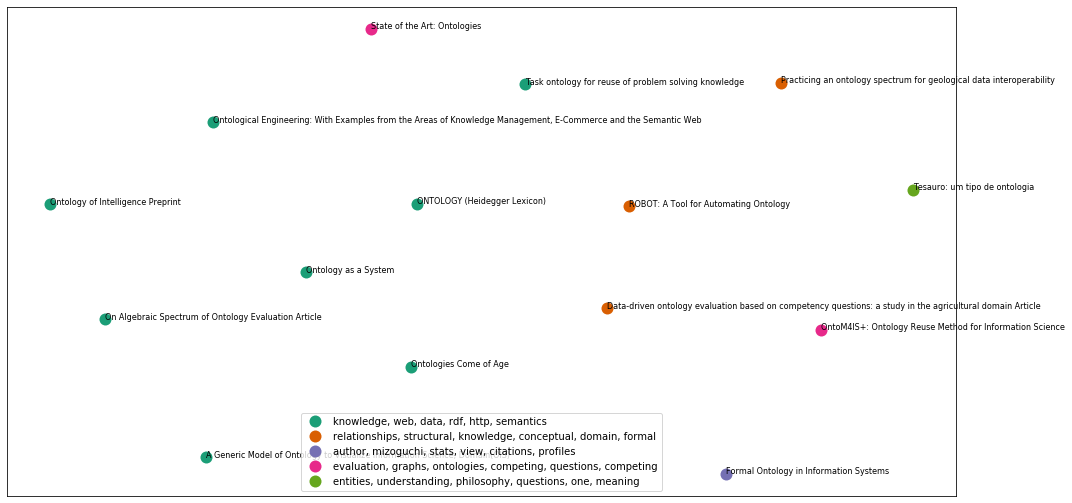

<Figure size 432x288 with 0 Axes>

In [83]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelleft=False)
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=8)  

plt.show()

#Saving the Fig
plt.savefig(os.path.join(outputs,'clusters_small_noaxes.png'), dpi=200)

A plotagem de cluster parece ótima, mas seria melhor sem rótulos sobrepostos. Nós vamos usar o D3.js (http://d3js.org/), um navegador baseado em / javascript interativo. Usaremos um wrapper matplotlib D3 chamado mpld3 (https://mpld3.github.io/). O Mpld3 basicamente permite que você use a sintaxe matplotlib para criar interativos da web. Ele tem uma API de alto nível realmente fácil que permite adicionar dicas ao passar o mouse.

Ele também possui algumas funcionalidades interessantes para aplicar zoom/panorâmica. O snippet javascript abaixo basicamente define um local personalizado para onde reside a alternância de zoom / panorâmica. Não se preocupe muito com isso e você realmente não precisa usá-lo, mas ajudou na formatação ao exportar para a Web posteriormente. A única coisa que você pode querer alterar é o atributo xey para a posição da barra de ferramentas.

In [80]:
#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [84]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }
"""

# Plot 
fig, ax = plt.subplots(figsize=(14,6)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, label=cluster_names[name], mec='none', color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

In [154]:
#uncomment the below to export to html
#os.chdir(outputs)
#html = mpld3.fig_to_html(fig)
#print(html)

#### 3.1.8 - Cluster hierárquico de documentos
[voltar](#3.1---Conte%C3%BAdo)

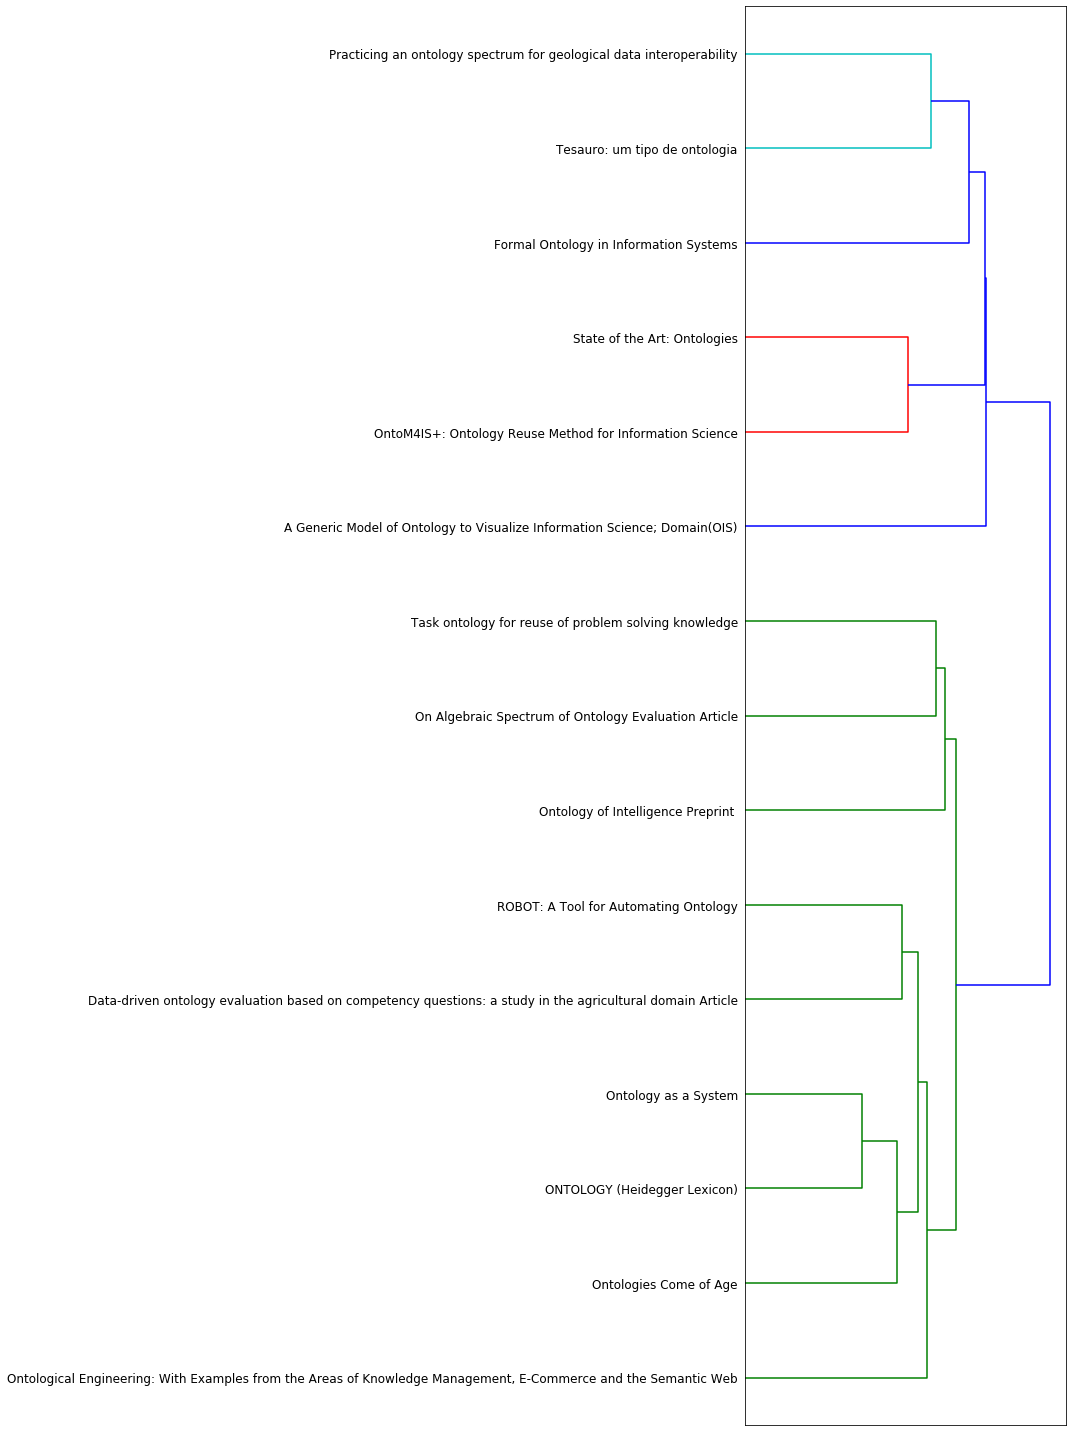

In [85]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.tight_layout() #show plot with tight layout
plt.savefig(os.path.join(outputs,'ward_clusters.png'), dpi=200)

#### 3.1.9 - Latent Dirichlet Allocation
[voltar](#3.1---Conte%C3%BAdo)

In [86]:
#strip any proper names from a text...unfortunately right now this is yanking the first word from a sentence too.
import string
def strip_proppers(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.islower()]
    return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip()

In [87]:
#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

In [88]:
#Latent Dirichlet Allocation implementation with Gensim
from gensim import corpora, models, similarities 

#remove proper names
preprocess = [strip_proppers(doc) for doc in synopses]

%time tokenized_text = [tokenize_and_stem(text) for text in preprocess]
%time texts = [[word for word in text if word not in stopwords] for text in tokenized_text]

CPU times: user 2 s, sys: 7.74 ms, total: 2.01 s
Wall time: 2.01 s
CPU times: user 397 ms, sys: 0 ns, total: 397 ms
Wall time: 397 ms


In [89]:
#print(len([word for word in texts[0] if word not in stopwords]))
print(len(texts[0]))

3055


In [90]:
dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=1, no_above=0.8)
corpus = [dictionary.doc2bow(text) for text in texts]

In [91]:
len(corpus)

15

In [92]:
%time lda = models.LdaModel(corpus, num_topics=5, id2word=dictionary, update_every=5, chunksize=10000, passes=100)

CPU times: user 31 s, sys: 935 ms, total: 32 s
Wall time: 16 s


In [93]:
print(lda[corpus[0]])

[(2, 0.99972665)]


In [94]:
topics = lda.print_topics(5, num_words=20)

In [95]:
lda.show_topics()

[(0,
  '0.018*"knowledg" + 0.015*"concept" + 0.014*"domain" + 0.010*"model" + 0.009*"scienc" + 0.007*"provid" + 0.006*"process" + 0.006*"languag" + 0.006*"system" + 0.006*"studi"'),
 (1,
  '0.000*"//www.researchgate.net/publication/243763523" + 0.000*"solv" + 0.000*"stat" + 0.000*"upload" + 0.000*"download" + 0.000*"request" + 0.000*"profil" + 0.000*"recoveri" + 0.000*"questions1" + 0.000*"nearbi"'),
 (2,
  '0.020*"geolog" + 0.015*"imagem" + 0.013*"imagen" + 0.012*"ontologia" + 0.011*"command" + 0.011*"indexação" + 0.010*"conteúdo" + 0.010*"data" + 0.009*"recuperação" + 0.008*"releas"'),
 (3,
  '0.011*"http" + 0.009*"may" + 0.009*"languag" + 0.009*"knowledg" + 0.008*"provid" + 0.007*"model" + 0.007*"applic" + 0.007*"support" + 0.006*"domain" + 0.006*"set"'),
 (4,
  '0.000*"//www.researchgate.net/publication/243763523" + 0.000*"solv" + 0.000*"stat" + 0.000*"upload" + 0.000*"download" + 0.000*"request" + 0.000*"profil" + 0.000*"recoveri" + 0.000*"instrument" + 0.000*"permeat"')]

In [96]:
topics_matrix = lda.show_topics(formatted=False, num_words=20)

In [97]:
topics_matrix[0]

(0,
 [('knowledg', 0.0179411),
  ('concept', 0.015143997),
  ('domain', 0.014191512),
  ('model', 0.010278134),
  ('scienc', 0.008625675),
  ('provid', 0.0068316013),
  ('process', 0.0063039702),
  ('languag', 0.0060820067),
  ('system', 0.0059987004),
  ('studi', 0.0057748496),
  ('communiti', 0.0056937784),
  ('specif', 0.005520198),
  ('research', 0.005379124),
  ('evalu', 0.005235375),
  ('design', 0.005136235),
  ('need', 0.0048094722),
  ('data', 0.004770558),
  ('mean', 0.004691632),
  ('comput', 0.0044268663),
  ('tool', 0.00439209)])

In [98]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

/home/heber/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.197248  0.006861       1        1  55.657120
3      0.181275  0.059784       2        1  32.050251
2     -0.229231  0.111042       3        1  12.279301
4     -0.074646 -0.088844       4        1   0.006663
1     -0.074646 -0.088844       5        1   0.006663, topic_info=     Category        Freq                                    Term       Total  \
2964  Default  110.000000                                  geolog  110.000000   
420   Default   85.000000                                  imagem   85.000000   
1147  Default  143.000000                                     may  143.000000   
421   Default   71.000000                                  imagen   71.000000   
568   Default   64.000000                               ontologia   64.000000   
...       ...         ...                                     ...         ...   
4969   Topic5    0.000579                                   recov    1.478309   
4970   Topic5    0.000579                               reservoir    1.478309   
4971   Topic5    0.000579                                   river    1.478309   
4973   Topic5    0.000579                               subdomain    1.478309   
4950   Topic5    0.000579  //www.bdpa.cnptia.embrapa.br/consulta/    1.478309   

      loglift  logprob  
2964  30.0000  30.0000  
420   29.0000  29.0000  
1147  28.0000  28.0000  
421   27.0000  27.0000  
568   26.0000  26.0000  
...       ...      ...  
4969   1.7704  -8.5496  
4970   1.7704  -8.5496  
4971   1.7704  -8.5496  
4973   1.7704  -8.5496  
4950   1.7704  -8.5496  

[379 rows x 6 columns], token_table=      Topic      Freq                                          Term
term                                                               
1345      3  0.724243      //commons.apache.org/proper/commons-cli/
4950      2  0.676449        //www.bdpa.cnptia.embrapa.br/consulta/
2880      2  0.674792  //www.researchgate.net/publication/243763523
4951      2  0.676449  //www.researchgate.net/publication/310017720
3694      1  0.992602                                          /owl
...     ...       ...                                           ...
890       2  0.415399                                           web
890       3  0.028648                                           web
1890      1  0.991322                                        websit
1893      1  0.068470                                      workflow
1893      3  0.924346                                      workflow

[386 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 5, 2])